In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<H2>Number of Local & International Cases<H2>

In [2]:
df = pd.read_csv('covid-19-case-numbers/epidemic-curve.csv')
df = df.sort_values('date')
df.head()

,date,type,value
0,2020-01-23,Imported,1
1,2020-01-23,Local,0
2,2020-01-24,Imported,2
3,2020-01-24,Local,0
4,2020-01-25,Imported,1


In [3]:
df['date'] = pd.to_datetime(df['date'])
df['year_month'] = df['date'].dt.strftime('%Y-%m')

df_grouped = df.groupby(['year_month', 'type'], as_index=False)['value'].sum()
df_grouped_month = df_grouped.year_month.unique()
print(df_grouped_month)

['2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06' '2020-07'
 '2020-08' '2020-09' '2020-10' '2020-11' '2020-12' '2021-01' '2021-02'
 '2021-03' '2021-04' '2021-05' '2021-06' '2021-07' '2021-08' '2021-09'
 '2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12' '2023-01' '2023-02']


/var/folders/d2/6d_m35bj27bg3mcg4tjxsc8m0000gn/T/ipykernel_21621/3944176764.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_grouped_month, rotation=90)


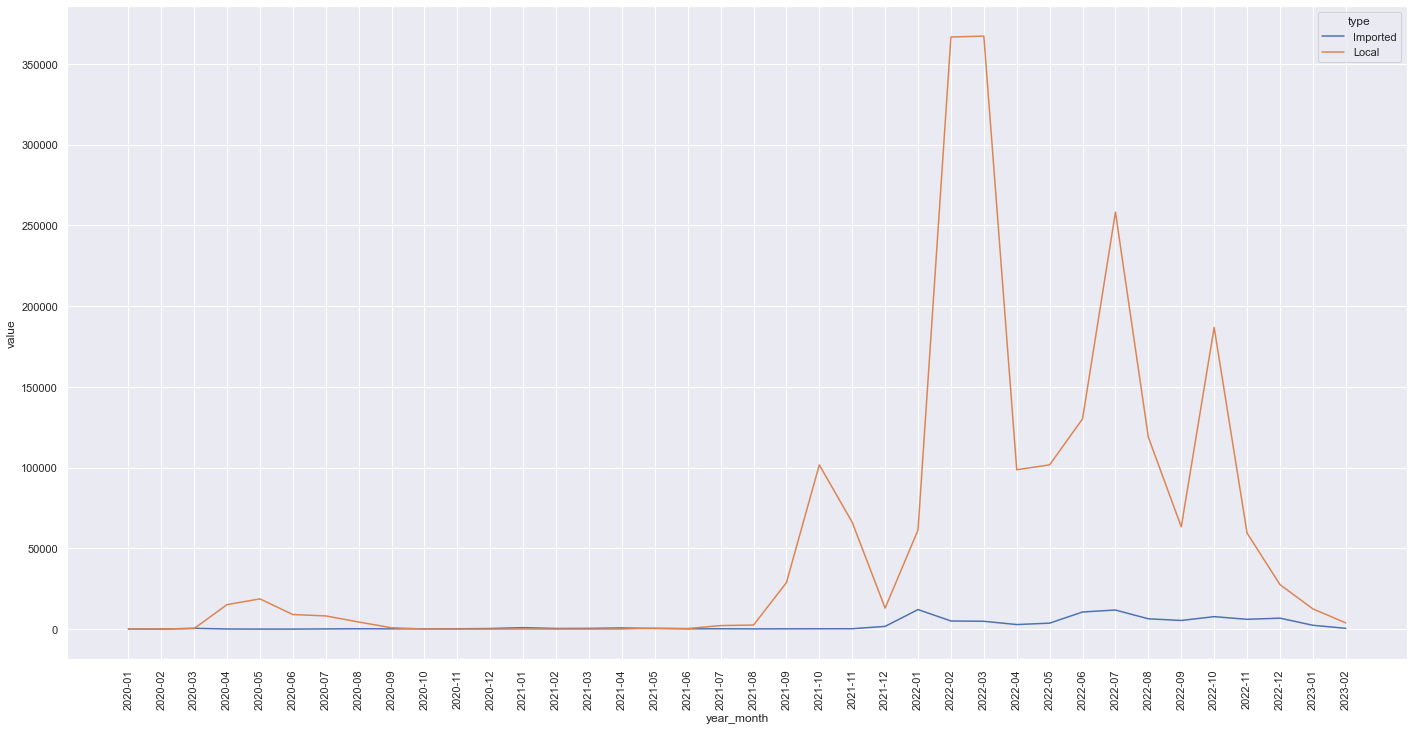

<Figure size 1728x864 with 0 Axes>

In [4]:
sns.set(rc={'figure.figsize':(24,12)}) 
ax = sns.lineplot(data = df_grouped, x = df_grouped.year_month, y = df_grouped.value, hue = df_grouped.type)
ax.set_xticklabels(df_grouped_month, rotation=90)
plt.show()
plt.clf()

In [5]:
#Code to seperate imported and exported so that normalized values can be plotted correctly
imported_df = df_grouped[df_grouped['type'] == 'Imported']
local_df = df_grouped[df_grouped['type'] == 'Local']
imported_df['normalized_value'] = (imported_df['value'] - imported_df['value'].min()) / (imported_df['value'].max() - imported_df['value'].min())
local_df['normalized_value'] = (local_df['value'] - local_df['value'].min()) / (local_df['value'].max() - local_df['value'].min())
local_df.head()

/var/folders/d2/6d_m35bj27bg3mcg4tjxsc8m0000gn/T/ipykernel_21621/3994800749.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imported_df['normalized_value'] = (imported_df['value'] - imported_df['value'].min()) / (imported_df['value'].max() - imported_df['value'].min())
/var/folders/d2/6d_m35bj27bg3mcg4tjxsc8m0000gn/T/ipykernel_21621/3994800749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local_df['normalized_value'] = (local_df['value'] - local_df['value'].min()) / (local_df['value'].max() - loca

,year_month,type,value,normalized_value
1,2020-01,Local,0,0.000000
3,2020-02,Local,78,0.000212
5,2020-03,Local,335,0.000912
7,2020-04,Local,15166,0.041305
9,2020-05,Local,18709,0.050954


/var/folders/d2/6d_m35bj27bg3mcg4tjxsc8m0000gn/T/ipykernel_21621/1480145539.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_grouped_month, rotation=90)


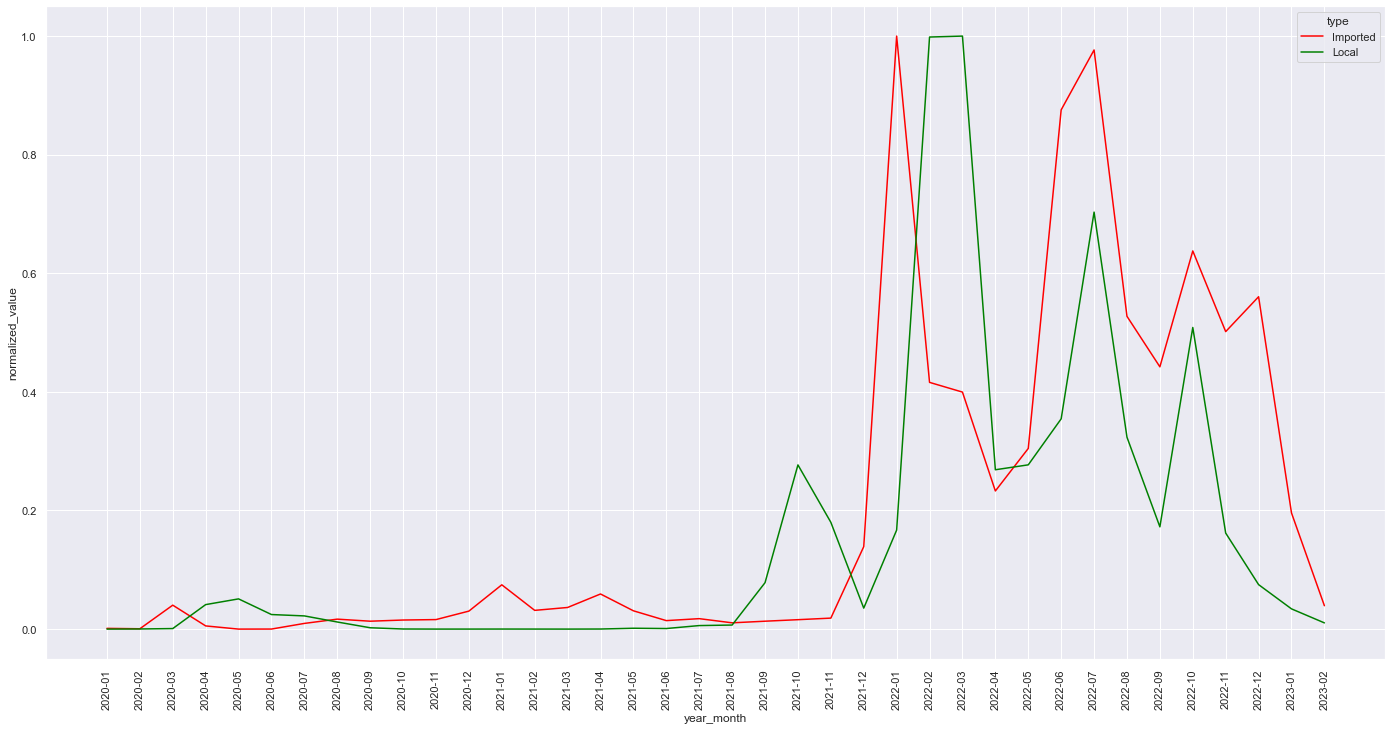

<Figure size 1728x864 with 0 Axes>

In [6]:
sns.set(rc={'figure.figsize':(24,12)}) 
ax = sns.lineplot(data = imported_df, x = imported_df.year_month, y = imported_df.normalized_value, hue = imported_df.type, palette=['red'])
ax = sns.lineplot(data = local_df, x = local_df.year_month, y = local_df.normalized_value, hue = local_df.type, palette=['green'])
ax.set_xticklabels(df_grouped_month, rotation=90)
plt.show()
plt.clf()

<H2>Covid Status by Age Group<H2>

In [7]:
df2 = pd.read_csv('covid-19-case-numbers/patients-needing-oxygen-supplementation-icu-care-or-died-by-age-groups.csv')
df2.head()

,day_of_as_of_date,age_groups,clinical_status,count_of_case
0,2023-01-14,70 years old and above,Deceased (based on date of death),1
1,2023-01-16,70 years old and above,Deceased (based on date of death),1
2,2023-01-19,70 years old and above,Deceased (based on date of death),1
3,2023-01-29,70 years old and above,Deceased (based on date of death),1
4,2023-01-14,70 years old and above,ICU,2


clinical_status
Deceased (based on date of death)                    5
Hospitalised                                       941
ICU                                                 25
Requires Oxygen Supplementation in General Ward    162
Name: count_of_case, dtype: int64



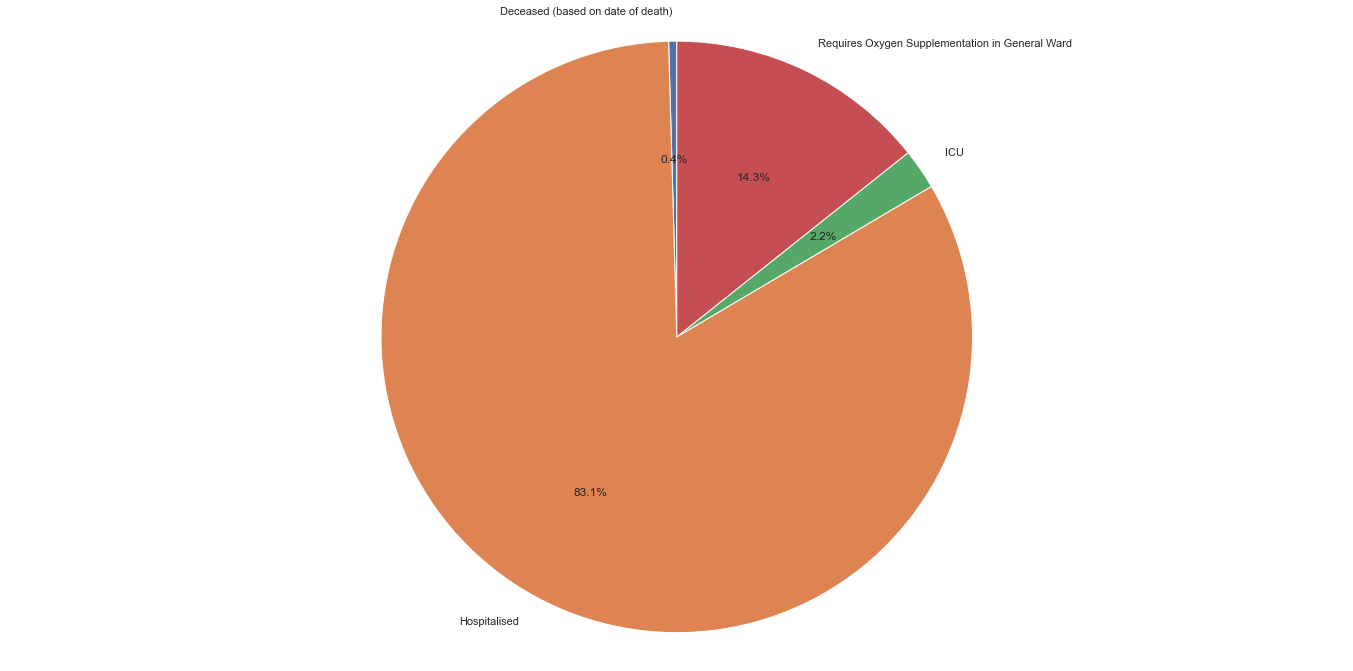

<Figure size 1728x864 with 0 Axes>

In [8]:
df_pie = df2['count_of_case'].groupby(df2['clinical_status']).sum()
print(df_pie)
print()

plt.pie(df_pie, labels=df_pie.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()
plt.clf()

/Users/abc/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


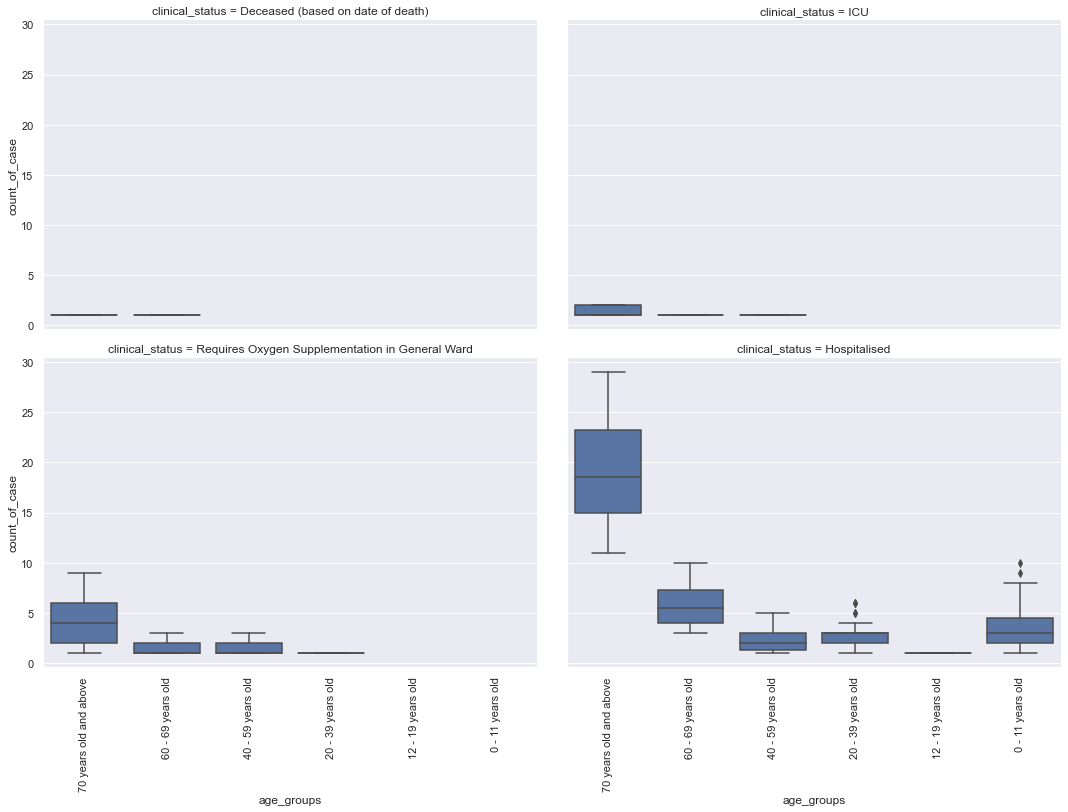

<Figure size 1728x864 with 0 Axes>

In [9]:
g = sns.FacetGrid(df2, col="clinical_status", col_wrap=2, height=5, aspect=1.5)
g = g.map(sns.boxplot, "age_groups", "count_of_case")
g.set_xticklabels(rotation=90)
plt.show()
plt.clf()

<H2>Number of ICU Beds Available<H2>

In [10]:
df3 = pd.read_csv('covid-19-case-numbers/daily-adult-icu-bed-utilisation.csv')
df3.head()

,as_of_date,status,value
0,10/1/2023,Non-COVID,200
1,10/1/2023,COVID,2
2,10/1/2023,Empty,98
3,11/1/2023,Non-COVID,186
4,11/1/2023,COVID,3


/var/folders/d2/6d_m35bj27bg3mcg4tjxsc8m0000gn/T/ipykernel_21621/935140058.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df3.as_of_date, rotation=90)


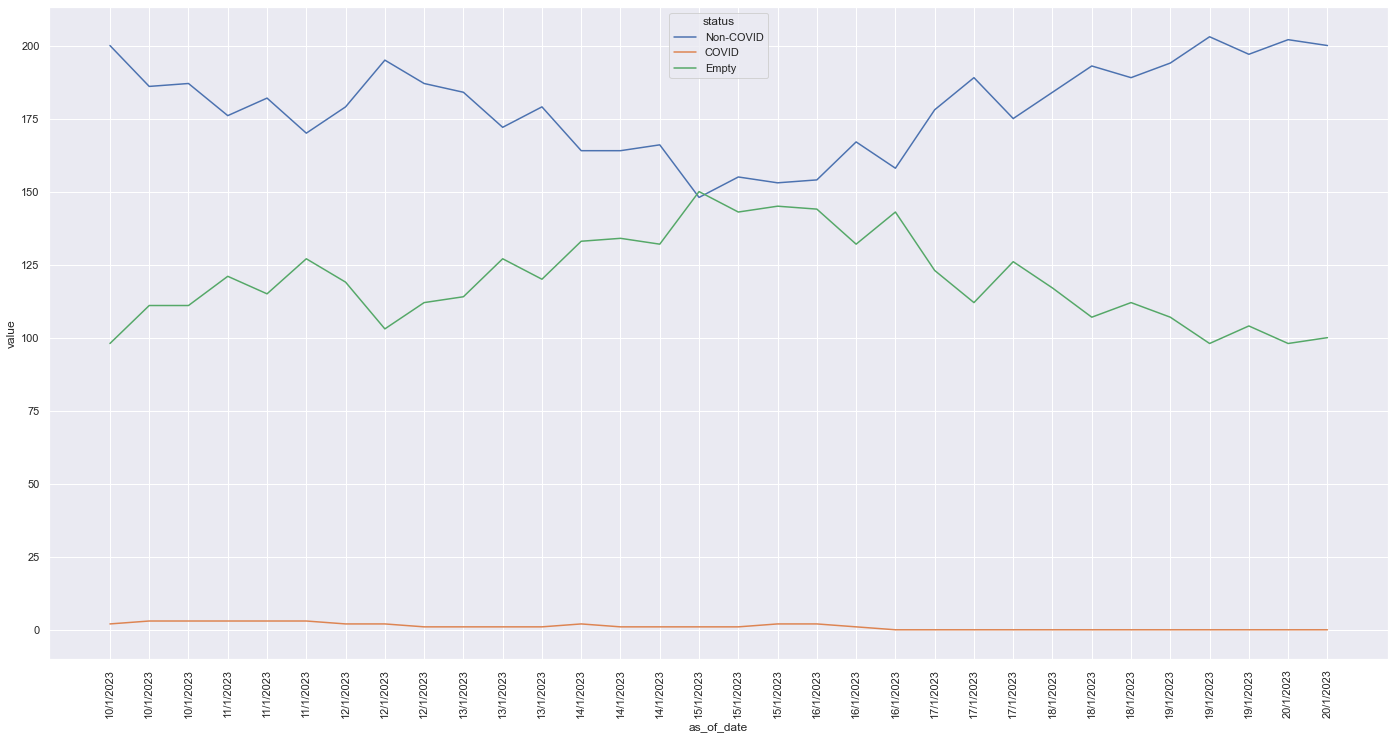

<Figure size 1728x864 with 0 Axes>

In [11]:
sns.set(rc={'figure.figsize':(24,12)}) 
ax = sns.lineplot(data = df3, x = df3.as_of_date, y = df3.value, hue = df3.status)
ax.set_xticklabels(df3.as_of_date, rotation=90)
plt.show()
plt.clf()

<H2>Number of deaths and persons in ICU<H2>

In [12]:
df4 = pd.read_csv('covid-19-case-numbers/moving-ave-of-deaths-active-cases-in-icu-per-100k-population-by-vaccination-status.csv')
df4.head()

,as_of_date,clinicalstatus,vaccination_status,count_of_case
0,2023-01-14,Deceased (based on date of death),Up-to-Date Vaccination,0.01
1,2023-01-15,Deceased (based on date of death),Up-to-Date Vaccination,0.01
2,2023-01-16,Deceased (based on date of death),Up-to-Date Vaccination,0.01
3,2023-01-17,Deceased (based on date of death),Up-to-Date Vaccination,0.01
4,2023-01-18,Deceased (based on date of death),Up-to-Date Vaccination,0.00


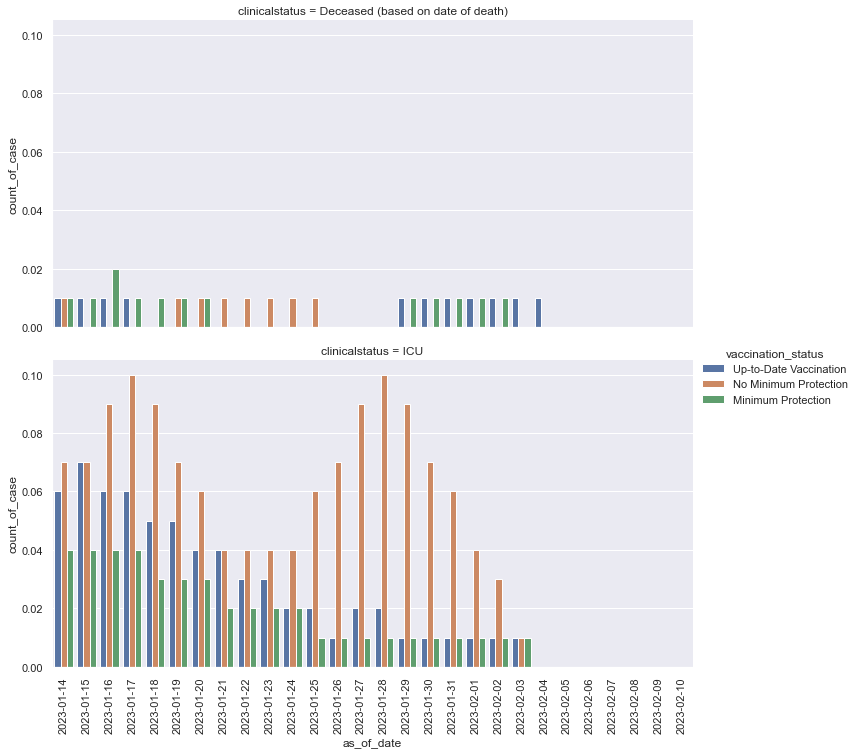

<Figure size 1728x864 with 0 Axes>

In [13]:
g = sns.catplot(x="as_of_date", y="count_of_case", hue="vaccination_status", col="clinicalstatus", kind="bar", col_wrap = 1, height=5, aspect=2, data=df4)
g.set_xticklabels(rotation=90)
plt.show()
plt.clf()

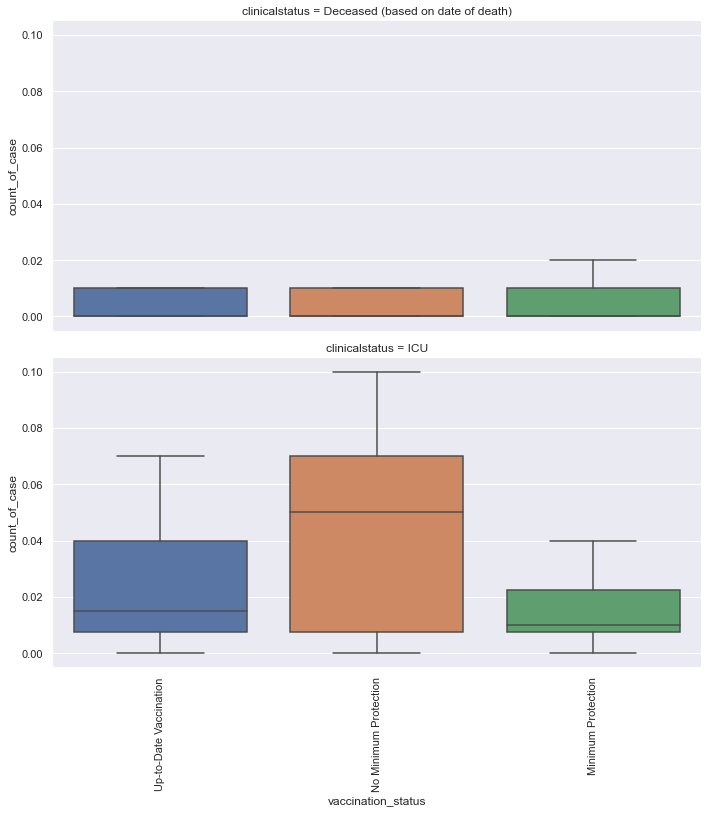

<Figure size 1728x864 with 0 Axes>

In [14]:
g = sns.catplot(x="vaccination_status", y="count_of_case", col="clinicalstatus", kind="box", col_wrap = 1, height=5, aspect=2, data=df4)
g.set_xticklabels(rotation=90)
plt.show()
plt.clf()